# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../../EmLinesModel_Results/'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_shared.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [6]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-0.405404,-0.301232,-0.127559,0.042963,-0.218744,-0.034901,-0.230091,0.023350,-0.045564,-0.128924,...,-0.393591,-0.159699,-0.311161,0.070627,0.028094,-0.250943,0.007115,-0.248525,0.052318,-0.076612
1,-0.272603,-0.019981,0.076273,0.434013,-0.076570,-0.292896,0.044048,-0.291564,0.369685,-0.081042,...,0.147578,0.026031,0.013230,-0.126332,-0.541429,-0.356156,-0.250131,-0.064826,0.121753,0.439466
2,-0.500571,-0.080340,0.091284,0.376522,-0.334739,-0.205758,-0.086881,-0.021726,0.156419,0.052309,...,-0.501068,0.082493,-0.012718,0.165805,-0.006782,-0.215747,0.151155,0.056194,0.101264,-0.144001
3,-0.290890,0.329591,-0.049942,0.424028,0.027528,0.163781,-0.366218,-0.197257,0.288824,-0.318127,...,-0.011582,-0.206836,0.407033,0.406244,0.040467,-0.056570,0.052146,-0.087220,-0.055706,0.258234
4,-0.494693,-0.348689,0.208936,0.400072,-0.238065,-0.294665,0.020352,0.344651,0.159505,0.099284,...,0.124231,0.038398,0.103046,0.047214,-0.317834,-0.308860,-0.297226,0.025575,0.035098,0.126970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-0.249657,-0.331523,0.365415,0.267503,-0.405487,-0.187848,0.200168,0.076138,0.255258,-0.201344,...,0.138330,-0.266221,0.306705,0.606149,0.016703,-0.131395,-0.227120,-0.229688,0.167140,0.081127
11996,-0.208281,0.425486,-0.208029,0.346877,-0.272018,-0.175458,0.187938,-0.134836,0.148080,0.013969,...,-0.295065,0.242948,0.064810,-0.290381,-0.490602,-0.075580,-0.120040,0.424051,0.038455,0.017238
11997,-0.599436,-0.405254,0.084449,0.303811,-0.031923,-0.271833,-0.205859,0.046327,0.337237,-0.070854,...,0.016939,-0.286202,-0.145351,0.272925,0.108561,-0.108478,-0.067242,-0.463150,0.047534,0.003571
11998,0.053051,0.029201,-0.127556,0.244478,-0.271957,-0.003476,-0.105838,0.061527,0.196048,-0.103948,...,-0.157240,0.036243,0.048772,0.048710,-0.374590,0.078630,-0.013755,0.165295,0.081575,-0.093289


In [7]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [8]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

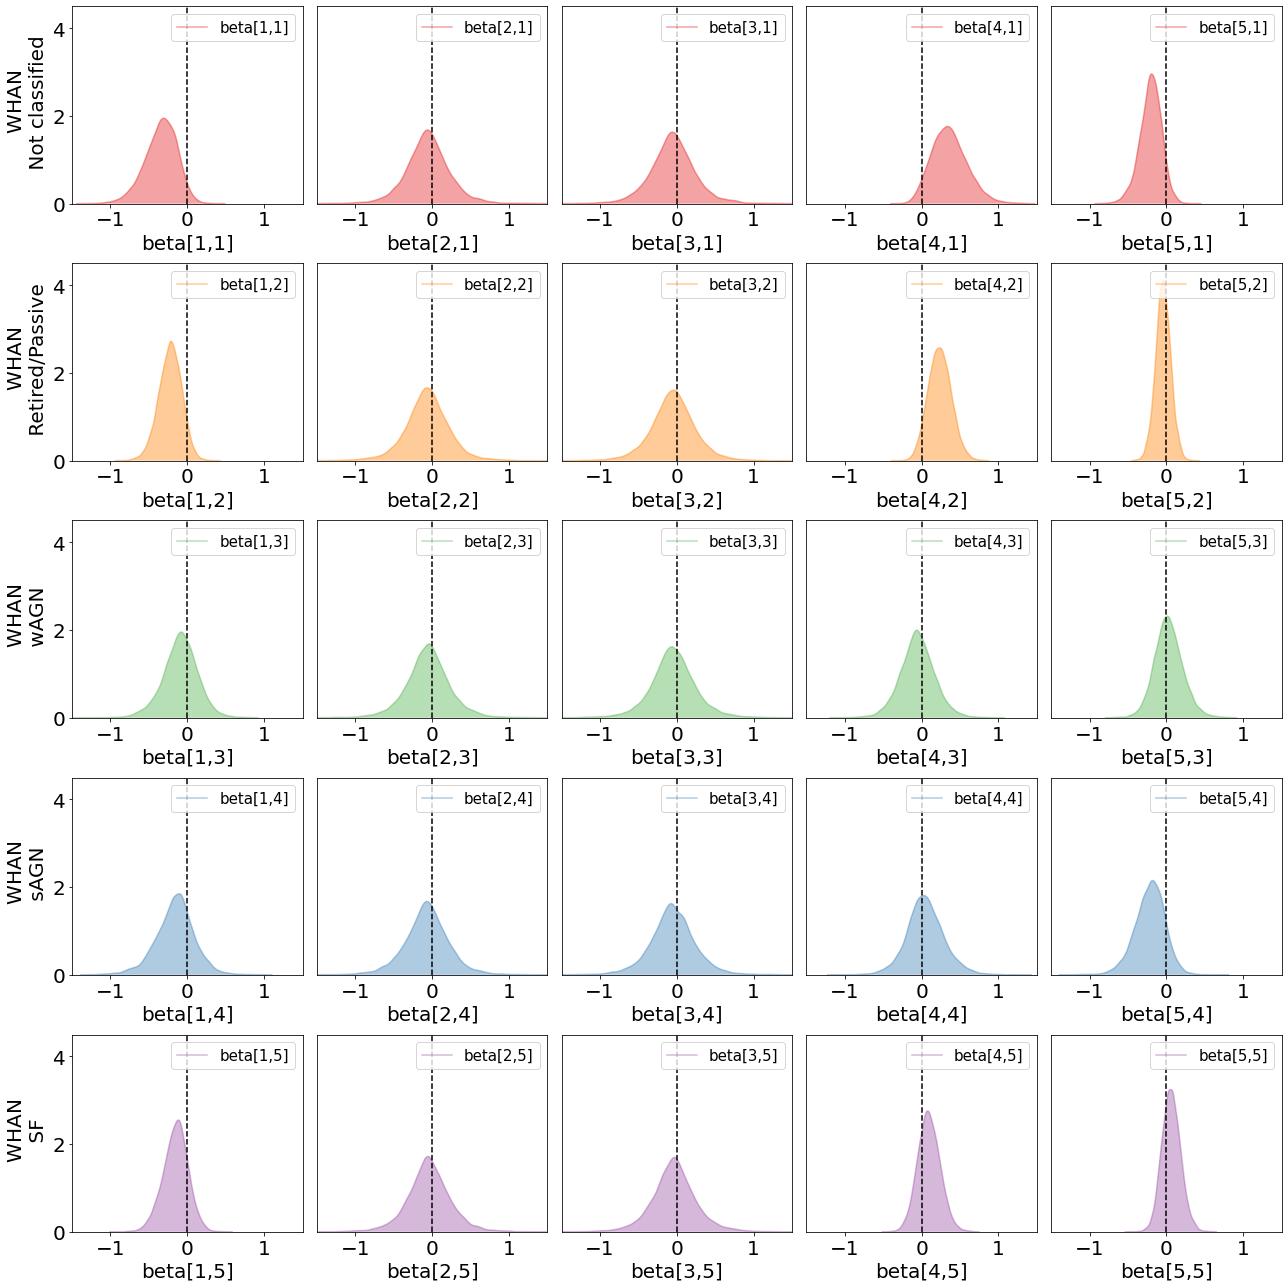

In [9]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [11]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_shared.csv'))

In [12]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1,1]', 'beta[2,1]', 'beta[3,1]',
       'beta[4,1]', 'beta[5,1]', 'beta[1,2]', 'beta[2,2]',
       ...
       'eta05[898]', 'eta05[899]', 'eta05[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=9037)

In [13]:
header = np.array(entire_fit.keys())

In [14]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [15]:
probabilities = entire_fit[prob_keys]

In [16]:
probabilities

,prob01[1],prob01[2],prob01[3],prob01[4],prob01[5],prob01[6],prob01[7],prob01[8],prob01[9],prob01[10],...,prob05[891],prob05[892],prob05[893],prob05[894],prob05[895],prob05[896],prob05[897],prob05[898],prob05[899],prob05[900]
0,0.073834,0.073463,0.073089,0.072712,0.072331,0.071948,0.071561,0.071172,0.070780,0.070385,...,0.330837,0.330090,0.329312,0.328503,0.327663,0.326794,0.325894,0.324964,0.324005,0.323015
1,0.093791,0.093779,0.093771,0.093766,0.093766,0.093768,0.093775,0.093785,0.093800,0.093817,...,0.954768,0.954545,0.954320,0.954091,0.953860,0.953626,0.953390,0.953150,0.952908,0.952663
2,0.009406,0.009396,0.009386,0.009376,0.009367,0.009359,0.009351,0.009343,0.009336,0.009330,...,0.285474,0.286158,0.286850,0.287550,0.288257,0.288972,0.289695,0.290425,0.291163,0.291909
3,0.215168,0.216091,0.217011,0.217930,0.218847,0.219762,0.220674,0.221584,0.222492,0.223398,...,0.842210,0.842164,0.842112,0.842052,0.841987,0.841914,0.841835,0.841749,0.841657,0.841557
4,0.020488,0.020381,0.020276,0.020174,0.020076,0.019980,0.019886,0.019796,0.019708,0.019623,...,0.643533,0.642459,0.641388,0.640318,0.639250,0.638184,0.637121,0.636059,0.634999,0.633942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.008726,0.008685,0.008647,0.008611,0.008576,0.008544,0.008513,0.008484,0.008457,0.008432,...,0.685126,0.683596,0.682033,0.680437,0.678809,0.677147,0.675452,0.673723,0.671961,0.670164
11996,0.024682,0.024843,0.025002,0.025159,0.025315,0.025468,0.025619,0.025768,0.025915,0.026060,...,0.543524,0.544501,0.545537,0.546634,0.547790,0.549006,0.550282,0.551618,0.553013,0.554467
11997,0.138571,0.137779,0.136997,0.136224,0.135460,0.134706,0.133961,0.133225,0.132498,0.131780,...,0.485372,0.483459,0.481479,0.479434,0.477323,0.475147,0.472905,0.470598,0.468226,0.465789
11998,0.041735,0.041742,0.041745,0.041746,0.041744,0.041739,0.041731,0.041720,0.041706,0.041689,...,0.411676,0.412183,0.412714,0.413268,0.413845,0.414445,0.415069,0.415715,0.416386,0.417080


In [17]:
probabilities_transposed = probabilities.T

In [18]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=12000, step=1)


In [19]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

12000


In [20]:
probabilities_transposed.columns = new_header

In [21]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr11990,itr11991,itr11992,itr11993,itr11994,itr11995,itr11996,itr11997,itr11998,itr11999
prob01[1],0.073834,0.093791,0.009406,0.215168,0.020488,0.015964,0.128503,0.024683,0.017846,0.010334,...,0.049256,0.003631,0.055870,0.130640,0.248942,0.008726,0.024682,0.138571,0.041735,0.055377
prob01[2],0.073463,0.093779,0.009396,0.216091,0.020381,0.016044,0.127729,0.024469,0.017837,0.010279,...,0.048940,0.003623,0.055966,0.131160,0.249274,0.008685,0.024843,0.137779,0.041742,0.055284
prob01[3],0.073089,0.093771,0.009386,0.217011,0.020276,0.016128,0.126959,0.024258,0.017825,0.010225,...,0.048623,0.003616,0.056054,0.131673,0.249558,0.008647,0.025002,0.136997,0.041745,0.055194
prob01[4],0.072712,0.093766,0.009376,0.217930,0.020174,0.016215,0.126192,0.024049,0.017809,0.010172,...,0.048305,0.003609,0.056132,0.132180,0.249793,0.008611,0.025159,0.136224,0.041746,0.055104
prob01[5],0.072331,0.093766,0.009367,0.218847,0.020076,0.016307,0.125428,0.023842,0.017790,0.010120,...,0.047987,0.003603,0.056201,0.132680,0.249980,0.008576,0.025315,0.135460,0.041744,0.055017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prob05[896],0.326794,0.953626,0.288972,0.841914,0.638184,0.747228,0.725322,0.409871,0.704279,0.556044,...,0.687373,0.648961,0.637693,0.716225,0.649443,0.677147,0.549006,0.475147,0.414445,0.823847
prob05[897],0.325894,0.953390,0.289695,0.841835,0.637121,0.748659,0.726438,0.411363,0.701837,0.556853,...,0.688345,0.647979,0.637170,0.716723,0.649656,0.675452,0.550282,0.472905,0.415069,0.823110
prob05[898],0.324964,0.953150,0.290425,0.841749,0.636059,0.750121,0.727581,0.412880,0.699325,0.557692,...,0.689316,0.646989,0.636634,0.717223,0.649860,0.673723,0.551618,0.470598,0.415715,0.822348
prob05[899],0.324005,0.952908,0.291163,0.841657,0.634999,0.751614,0.728749,0.414421,0.696741,0.558558,...,0.690284,0.645992,0.636087,0.717726,0.650055,0.671961,0.553013,0.468226,0.416386,0.821560


In [22]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [23]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
prob01[1],12000.0,0.075523,0.089362,0.000013,0.001146,0.015140,0.042578,0.102053,0.329418,0.820055
prob01[2],12000.0,0.075448,0.089284,0.000013,0.001148,0.015076,0.042568,0.101891,0.329138,0.818902
prob01[3],12000.0,0.075372,0.089205,0.000013,0.001151,0.015054,0.042508,0.101801,0.328551,0.817762
prob01[4],12000.0,0.075295,0.089127,0.000014,0.001152,0.015050,0.042430,0.101547,0.328573,0.816638
prob01[5],12000.0,0.075218,0.089050,0.000014,0.001153,0.015035,0.042375,0.101344,0.327837,0.815528
...,...,...,...,...,...,...,...,...,...,...
prob05[896],12000.0,0.613780,0.189212,0.053595,0.231031,0.478144,0.629385,0.762245,0.922033,0.988686
prob05[897],12000.0,0.613500,0.189389,0.053283,0.230817,0.477706,0.628967,0.761856,0.922338,0.988736
prob05[898],12000.0,0.613214,0.189577,0.052962,0.230465,0.476911,0.628954,0.761730,0.922710,0.988788
prob05[899],12000.0,0.612921,0.189776,0.052633,0.230059,0.477107,0.628513,0.761675,0.922911,0.988840


In [24]:
print(shrinked_df.values.shape, parameters.shape)

(4500, 10) (4500, 2)


In [25]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [26]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [27]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [28]:
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.075523,0.089362,0.000013,0.001146,0.015140,0.042578,0.102053,0.329418,0.820055,9.729482,0.067940
prob01[2],12000.0,0.075448,0.089284,0.000013,0.001148,0.015076,0.042568,0.101891,0.329138,0.818902,9.729482,0.084889
prob01[3],12000.0,0.075372,0.089205,0.000013,0.001151,0.015054,0.042508,0.101801,0.328551,0.817762,9.729482,0.101837
prob01[4],12000.0,0.075295,0.089127,0.000014,0.001152,0.015050,0.042430,0.101547,0.328573,0.816638,9.729482,0.118786
prob01[5],12000.0,0.075218,0.089050,0.000014,0.001153,0.015035,0.042375,0.101344,0.327837,0.815528,9.729482,0.135734
...,...,...,...,...,...,...,...,...,...,...,...,...
prob05[896],12000.0,0.613780,0.189212,0.053595,0.231031,0.478144,0.629385,0.762245,0.922033,0.988686,11.678570,0.491656
prob05[897],12000.0,0.613500,0.189389,0.053283,0.230817,0.477706,0.628967,0.761856,0.922338,0.988736,11.678570,0.508604
prob05[898],12000.0,0.613214,0.189577,0.052962,0.230465,0.476911,0.628954,0.761730,0.922710,0.988788,11.678570,0.525553
prob05[899],12000.0,0.612921,0.189776,0.052633,0.230059,0.477107,0.628513,0.761675,0.922911,0.988840,11.678570,0.542501


In [29]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [30]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [31]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [32]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

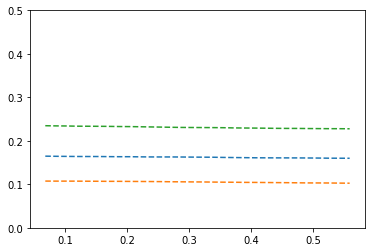

In [33]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [34]:
np.unique(prob01['Z'].values)

array([0.06794   , 0.08488862, 0.10183724, 0.11878586, 0.13573448,
       0.1526831 , 0.16963172, 0.18658034, 0.20352897, 0.22047759,
       0.23742621, 0.25437483, 0.27132345, 0.28827207, 0.30522069,
       0.32216931, 0.33911793, 0.35606655, 0.37301517, 0.38996379,
       0.40691241, 0.42386103, 0.44080966, 0.45775828, 0.4747069 ,
       0.49165552, 0.50860414, 0.52555276, 0.54250138, 0.55945   ])

In [35]:
subset = prob01[prob01['Z']<0.07]

In [36]:
subset

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.075523,0.089362,0.000013,0.001146,0.015140,0.042578,0.102053,0.329418,0.820055,9.729482,0.06794
prob01[31],12000.0,0.086670,0.090326,0.000043,0.002294,0.022376,0.055699,0.120163,0.334402,0.777345,9.796692,0.06794
prob01[61],12000.0,0.099897,0.091346,0.000131,0.004376,0.032299,0.071770,0.139971,0.341355,0.731455,9.863902,0.06794
prob01[91],12000.0,0.115420,0.092201,0.000377,0.007959,0.045472,0.090914,0.161962,0.350809,0.683951,9.931112,0.06794
prob01[121],12000.0,0.133404,0.092626,0.001016,0.013685,0.062248,0.112550,0.185438,0.361707,0.636494,9.998322,0.06794
prob01[151],12000.0,0.153921,0.092343,0.002555,0.023004,0.082946,0.137486,0.210189,0.373035,0.601849,10.065532,0.06794
prob01[181],12000.0,0.176916,0.091090,0.006003,0.036323,0.107425,0.164724,0.234754,0.384552,0.583224,10.132742,0.06794
prob01[211],12000.0,0.202166,0.088676,0.013145,0.055501,0.135309,0.193247,0.260023,0.393462,0.565931,10.199952,0.06794
prob01[241],12000.0,0.229261,0.085042,0.023308,0.079725,0.166464,0.223049,0.286316,0.405621,0.550062,10.267161,0.06794
prob01[271],12000.0,0.257602,0.080302,0.038557,0.109895,0.198987,0.254355,0.312834,0.418993,0.535682,10.334371,0.06794


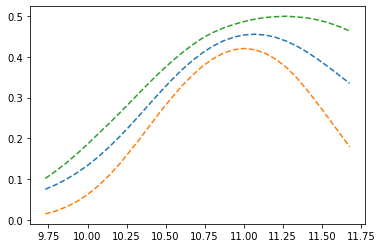

In [37]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [39]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_shared.csv'))

In [40]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.0755,0.0014,0.0894,0.0011,0.0151,0.0426,0.1021,0.3294,3951,1.0007,0.067940,9.729482
1,prob01[2],0.0754,0.0014,0.0893,0.0011,0.0151,0.0426,0.1019,0.3292,3951,1.0007,0.084889,9.729482
2,prob01[3],0.0754,0.0014,0.0892,0.0011,0.0151,0.0425,0.1018,0.3287,3952,1.0007,0.101837,9.729482
3,prob01[4],0.0753,0.0014,0.0891,0.0011,0.0150,0.0424,0.1016,0.3287,3953,1.0007,0.118786,9.729482
4,prob01[5],0.0752,0.0014,0.0890,0.0011,0.0150,0.0424,0.1014,0.3281,3955,1.0007,0.135734,9.729482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,prob05[896],0.6138,0.0026,0.1892,0.2308,0.4781,0.6294,0.7623,0.9220,5162,1.0002,0.491656,11.678570
4496,prob05[897],0.6135,0.0026,0.1894,0.2308,0.4777,0.6290,0.7619,0.9224,5157,1.0002,0.508604,11.678570
4497,prob05[898],0.6132,0.0026,0.1896,0.2304,0.4769,0.6290,0.7617,0.9227,5153,1.0002,0.525553,11.678570
4498,prob05[899],0.6129,0.0026,0.1898,0.2300,0.4771,0.6285,0.7617,0.9229,5149,1.0002,0.542501,11.678570


In [41]:
prob01_stan = summary_stan.iloc[:900, :]

In [42]:
prob01_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.0755,0.0014,0.0894,0.0011,0.0151,0.0426,0.1021,0.3294,3951,1.0007,0.067940,9.729482
1,prob01[2],0.0754,0.0014,0.0893,0.0011,0.0151,0.0426,0.1019,0.3292,3951,1.0007,0.084889,9.729482
2,prob01[3],0.0754,0.0014,0.0892,0.0011,0.0151,0.0425,0.1018,0.3287,3952,1.0007,0.101837,9.729482
3,prob01[4],0.0753,0.0014,0.0891,0.0011,0.0150,0.0424,0.1016,0.3287,3953,1.0007,0.118786,9.729482
4,prob01[5],0.0752,0.0014,0.0890,0.0011,0.0150,0.0424,0.1014,0.3281,3955,1.0007,0.135734,9.729482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,prob01[896],0.3289,0.0018,0.1954,0.0514,0.1733,0.2932,0.4560,0.7773,11264,0.9998,0.491656,11.678570
896,prob01[897],0.3286,0.0018,0.1954,0.0512,0.1732,0.2928,0.4559,0.7778,11256,0.9998,0.508604,11.678570
897,prob01[898],0.3283,0.0018,0.1955,0.0509,0.1730,0.2928,0.4561,0.7779,11247,0.9998,0.525553,11.678570
898,prob01[899],0.3280,0.0018,0.1955,0.0507,0.1731,0.2926,0.4558,0.7771,11238,0.9998,0.542501,11.678570


In [43]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[12]

In [44]:
chosen_mass

10.536001172413792

In [45]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [46]:
# subset_temp

In [47]:
# plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
# plt.show()

In [48]:
# %matplotlib notebook

In [49]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.set_xlabel("\n z", fontsize=14)
# ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
# ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
# for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
# ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
# ax.view_init(elev=22., azim=315)
# plt.show()

In [50]:
# prob01.boxplot(column='50%')

In [51]:
# prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [52]:
m = 0.01
z = np.arange(0., 0.35, 0.01)
p = posteriors

In [53]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
        
        
        
        
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [54]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [55]:
idx = np.where(beta<=10)

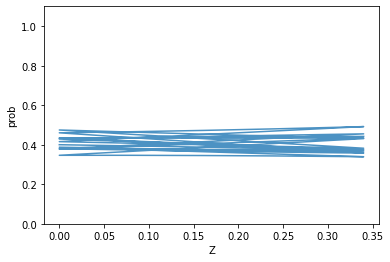

In [56]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()